<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])



In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**TASK 1a)**
**BOXPLOT MEDV**

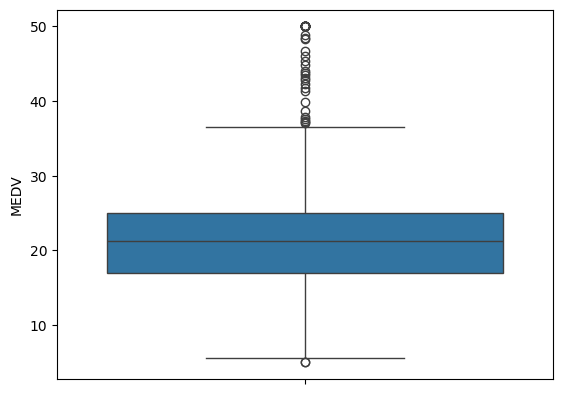

In [9]:
BXP_MEDV = sns.boxplot(y = "MEDV", data = boston_df)

**TASK 1b)**
**BARPLOT CHAS**

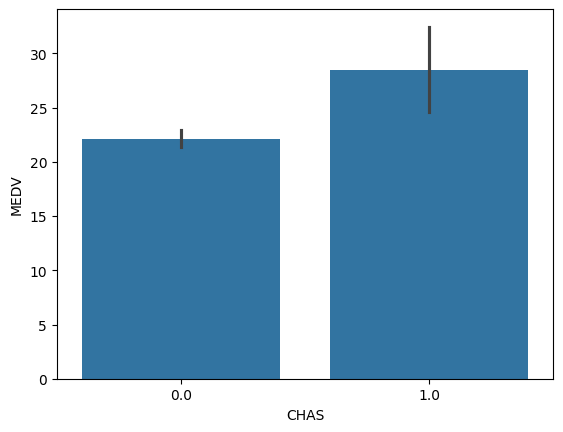

In [13]:
BAP_CHAS = sns.barplot(x = "CHAS", y = "MEDV", data = boston_df)

In [25]:
bins_edges = [0,35,71, float("inf")]
DAGE = pd.cut(boston_df["AGE"], bins = bins_edges, labels = ["Low", "Medium", "High"])

In [9]:
boston_df["DAGE"] = DAGE

**TASK 1c)**
**BOXPLOT MEDV on DAGE**

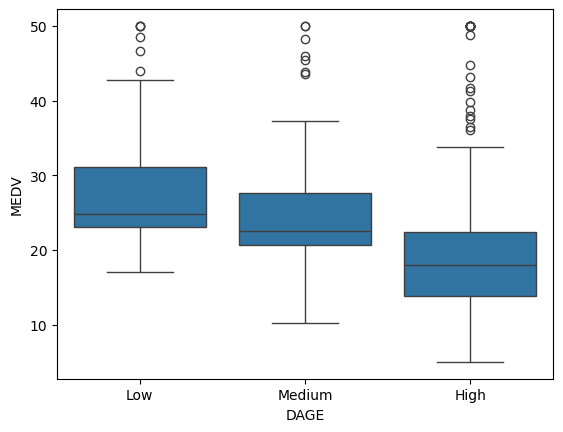

In [21]:
BXP_MEDVxDAGE = sns.boxplot(x = "DAGE", y = "MEDV", data = boston_df)

**TASK 1d)**
**SCATTERPLOT NOX on INDUS**

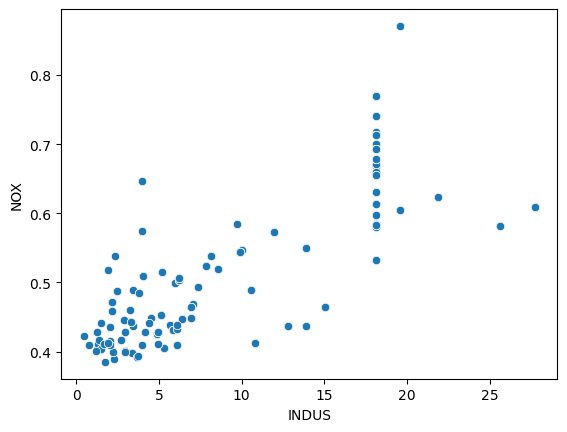

In [22]:
SCTP_NOXxINDUS = sns.scatterplot( x = "INDUS", y = "NOX", data = boston_df)

There seems to be a **positive linear relationship** between proportion of non-retail business acres per town (**INDUS**) and  nitric oxides concentration (**NOX**) such that a lower proportion of non-retail businesses acres is associated with lower nitric oxides concentrations, while as the proportion of non-retail acres increases, levels of nitric oxides concetrations also seem to increase. 

**TASK 1e)**
**HISTOGRAM PTTRATIO**

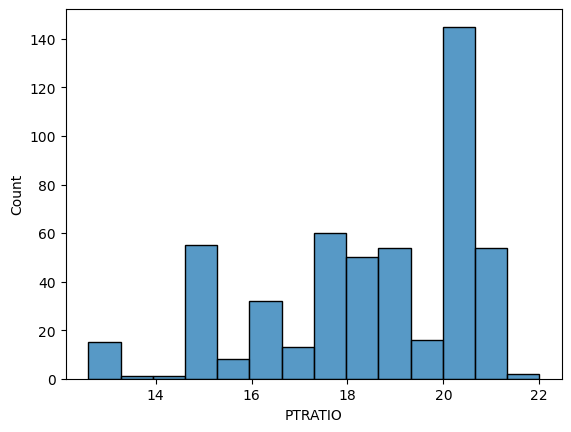

In [25]:
HIST_PTRATIO = sns.histplot(x = "PTRATIO", data = boston_df)

**TASK 2a)**

*H0* : There's no significant difference in median value of houses bounded by the Charles river or not  

*H1* : There's a significant difference in median value of houses bounded by the Charles river or not


In [33]:
ttest1 = scipy.stats.ttest_ind(boston_df[boston_df["CHAS"] == 1]["MEDV"], boston_df[boston_df["CHAS"] == 0]["MEDV"], equal_var=True)
ttest1

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [34]:
pvalue=7.390623170519905e-05
alpha = 0.05
is_significant = pvalue < alpha
is_significant

True

**RESULTS**

Since p-value is **below the significance threshold**, we **reject the null-hypothesis** and we conclude that there's a significant difference in median values of house bounded by the Charles river and houses that are not.

In [10]:
scipy.stats.levene(boston_df[boston_df["DAGE"] == "Low"]["MEDV"], boston_df[boston_df["DAGE"] == "Medium"]["MEDV"],boston_df[boston_df["DAGE"] == "High"]["MEDV"])

LeveneResult(statistic=2.839641888571076, pvalue=0.059383991171756585)

Since p-value from Levene came out nonsignificant, we conclude there's evidence for homoscedasticity in the group samples

**TASK 2b)**

*H0* :  there's no significant difference in Median values of houses (**MEDV**) for each proportion of owner occupied units built prior to 1940 (**AGE**)

*H1* :  there's a significant difference in Median values of houses (**MEDV**) for each proportion of owner occupied units built prior to 1940 (**AGE**)

In [11]:
Low_Age = boston_df[boston_df["DAGE"] == "Low"]["MEDV"]
Medium_Age = boston_df[boston_df["DAGE"] == "Medium"]["MEDV"]
High_Age = boston_df[boston_df["DAGE"] == "High"]["MEDV"]
f_statistic, p_value = scipy.stats.f_oneway(Low_Age, Medium_Age, High_Age)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 37.34433173812786, P-Value: 7.556944091555335e-16


In [16]:
pvalue_ANOVA = 7.556944091555335e-16
is_significant_ANOVA = pvalue_ANOVA < 0.05
is_significant_ANOVA

True

**RESULTS**

Since p-value from ANOVA is **below the significance threshold**, we **reject the null-hypothesis** that there's no difference between age groups in the median value of owner-occupied homes in $1000's

**TASK 2c)**

*H0* : There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*H0* : There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [17]:
scipy.stats.pearsonr(boston_df["INDUS"], boston_df["NOX"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [18]:
pvalue_Pearson = 7.913361061210442e-98
is_significant_Pearson = pvalue_Pearson < 0.05
is_significant_Pearson

True

**RESULTS**

Since p-value is **below the significance threshold**, we **reject the null-hypothesis** and we **cannot** conclude that there's no relationship between nitric oxide concentration and proportion of non-retail business acres per town.

**TASK 2d)**

*H0* : there's no significant relationship between additional weighted distance  to the five Boston employment centres (**DIS**) and the median value of owner occupied homes (**MEDV**)

*H1* : there's a significant relationship between additional weighted distance  to the five Boston employment centres (**DIS**) and the median value of owner occupied homes (**MEDV**)

In [23]:
model = sm.OLS(boston_df["MEDV"], boston_df["DIS"]).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                   1.52e-146
Time:                        15:23:02   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pvalue_F = 1.52e-146
is_significant_regression = pvalue_F < 0.05
is_significant_regression

True

**RESULTS**

Since the p-value for the F statistic is **below the significance threshold** and the confidence interval associated with the coefficient of the DIS predictor **does not include zero**, we reject the null-hypothesis and we conclude that there appears to be a **significant relationship** between weighted distances to five Boston employment centres (**DIS**) and Median value of owner-occupied homes in $1000's (**MEDV**). 